In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.decomposition import PCA

In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape

(12330, 18)

In [5]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


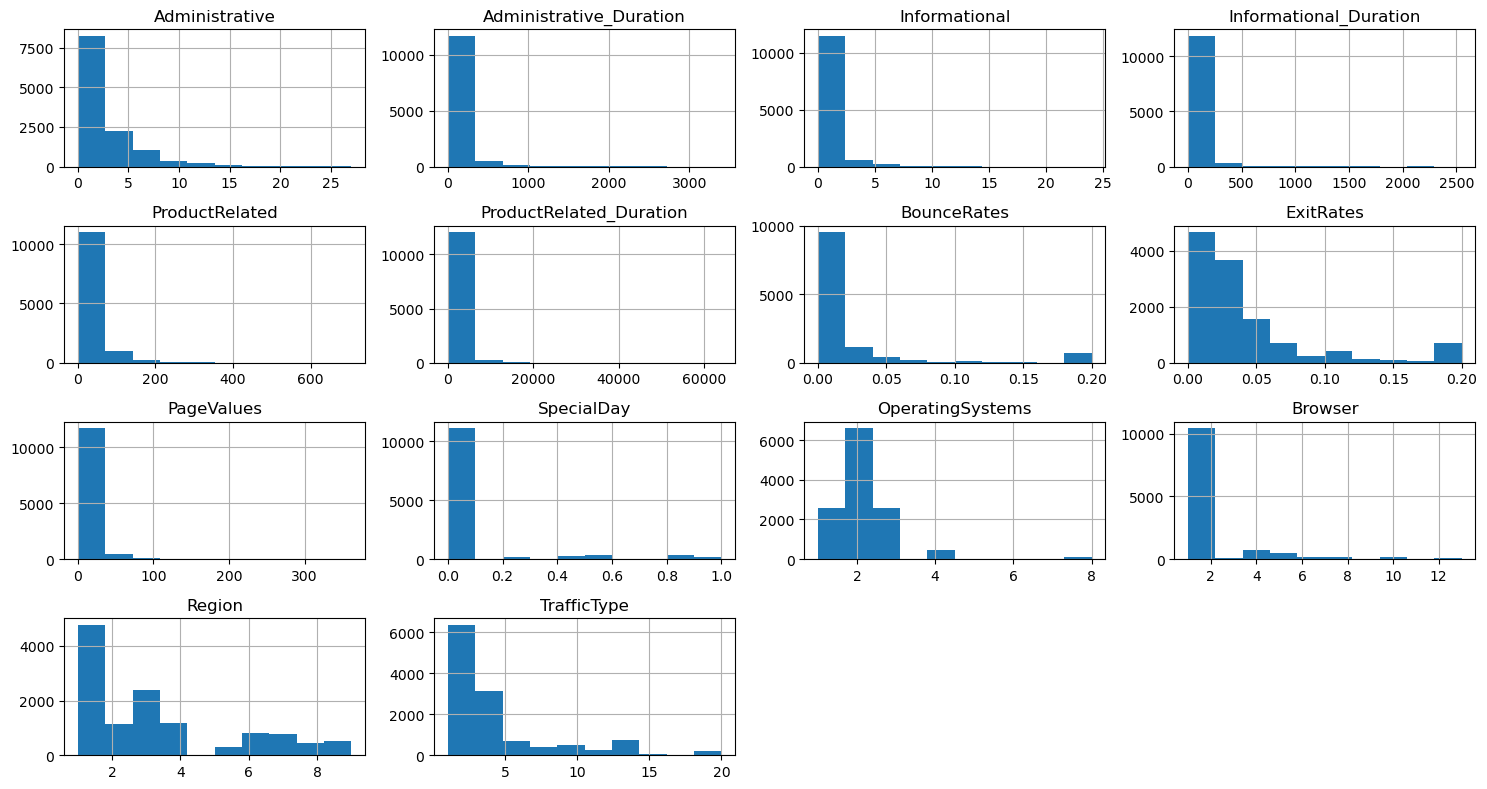

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [7]:
df.hist()

plt.tight_layout()

plt.show()

df.skew()

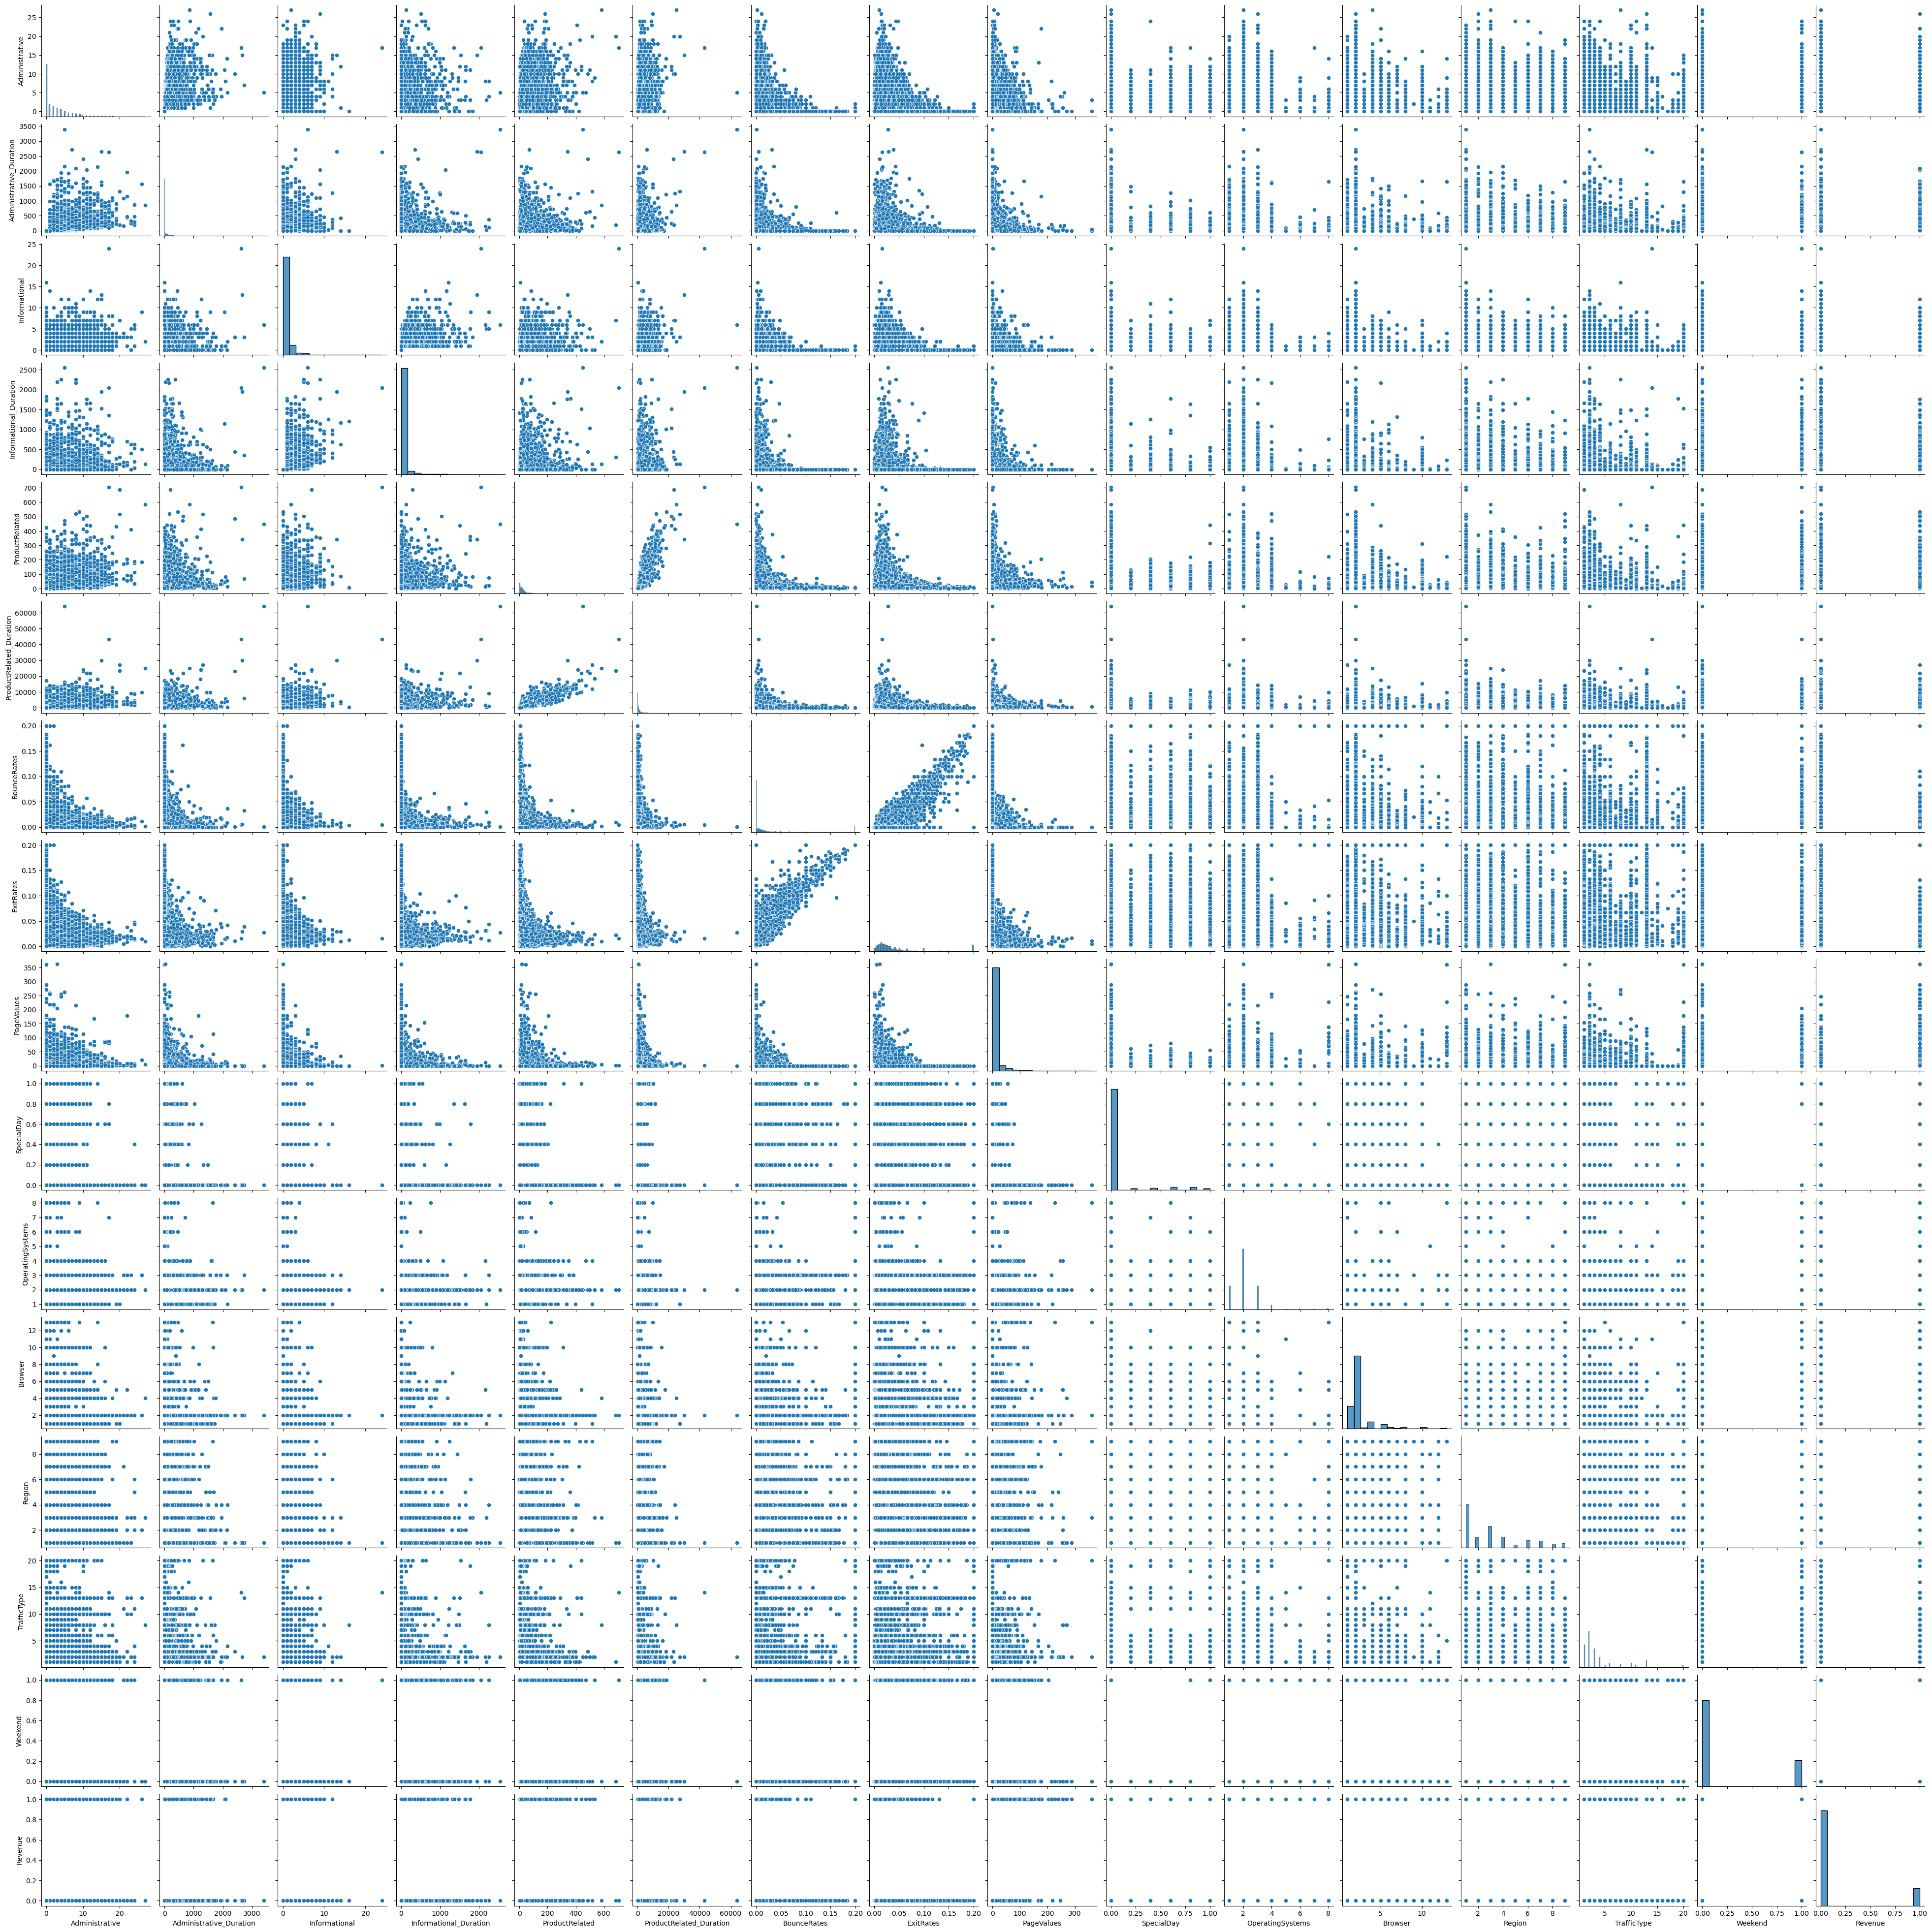

In [8]:
sns.pairplot(data=df,palette='tab10')
plt.show()

In [10]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
df_cat = df.select_dtypes(object)
df_catego = pd.get_dummies(df_cat,drop_first=True)
df_catego

,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
12325,1,0,0,0,0,0,0,0,0,0,1
12326,0,0,0,0,0,0,1,0,0,0,1
12327,0,0,0,0,0,0,1,0,0,0,1
12328,0,0,0,0,0,0,1,0,0,0,1


In [12]:
df_num = df.select_dtypes(np.number)
df_num.shape

(12330, 14)

In [13]:
X = pd.concat([df_num,df_catego],axis=1)
X.shape

(12330, 25)

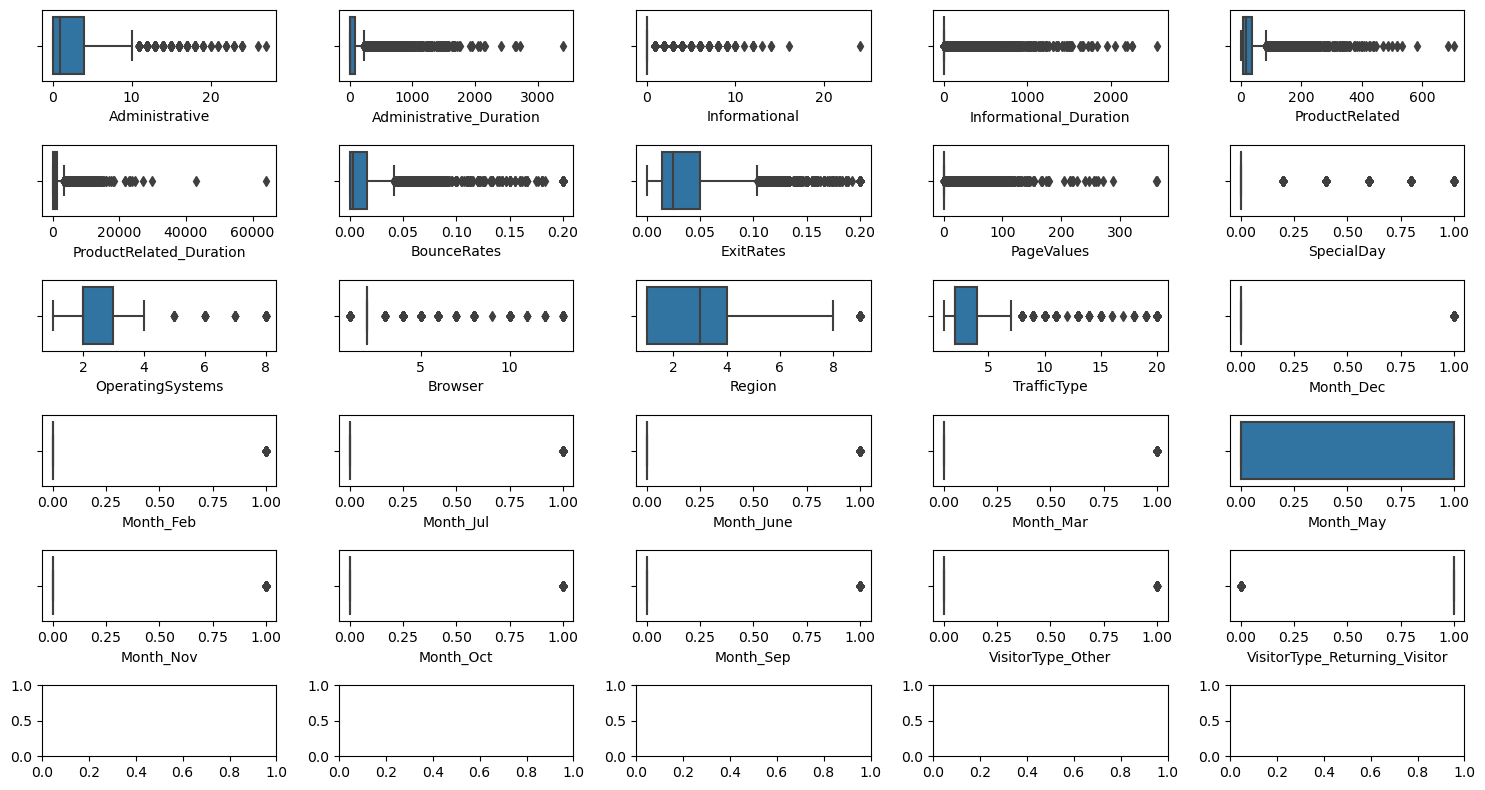

In [14]:
fig,ax = plt.subplots(nrows=6,ncols=5,figsize=(15,8))
for variable,subplot in zip(X.columns,ax.flatten()):
    
    sns.boxplot(X[variable],ax=subplot)
    
plt.tight_layout()

plt.show()

In [15]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3-Q1
X = X[~((X < (Q1-1.5*IQR)) | (X > (Q3+1.5*IQR))).any(axis=1)]
X.shape

(517, 25)

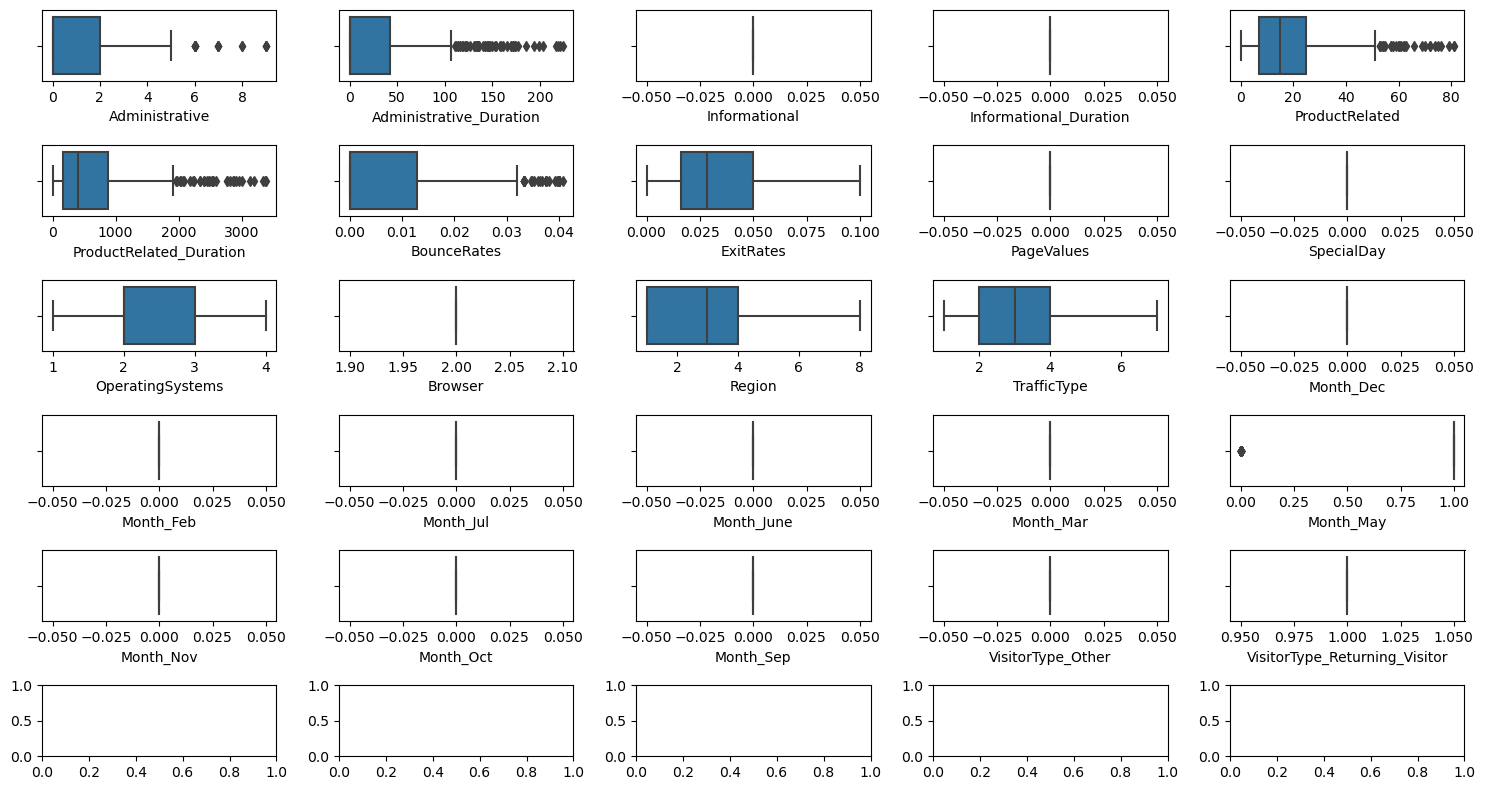

In [16]:
fig,ax = plt.subplots(nrows=6,ncols=5,figsize=(15,8))
for variable,subplot in zip(X.columns,ax.flatten()):
    
    sns.boxplot(X[variable],ax=subplot)
    
plt.tight_layout()

plt.show()

In [17]:
x_scaler = StandardScaler()
num_scaled = x_scaler.fit_transform(X)
df1 = pd.DataFrame(num_scaled,columns=X.columns)
df1.shape

(517, 25)

In [18]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.660779,-0.607131,0.0,0.0,-0.356750,-0.717657,2.056551,-0.356271,0.0,0.0,...,0.0,0.0,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0
1,0.420306,-0.272426,0.0,0.0,-0.853222,-0.882523,-0.667033,-0.047348,0.0,0.0,...,0.0,0.0,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0
2,-0.660779,-0.607131,0.0,0.0,-0.667045,-0.608825,1.545879,1.625985,0.0,0.0,...,0.0,0.0,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0
3,-0.660779,-0.607131,0.0,0.0,-0.853222,-0.573625,-0.667033,-0.582814,0.0,0.0,...,0.0,0.0,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0
4,-0.120237,-0.525991,0.0,0.0,-0.356750,-0.717059,2.283516,1.960652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0


In [19]:
wcss = []

for k in range(1,8):
    
    kmean = KMeans(n_clusters=k,random_state=10)
    kmean.fit(df1)
    wcss.append(kmean.inertia_)
    
wcss

[5170.0,
 4258.798066455196,
 3846.6908595253935,
 3484.9014383263075,
 3178.7048077633995,
 2935.687042693823,
 2734.2831874229414]

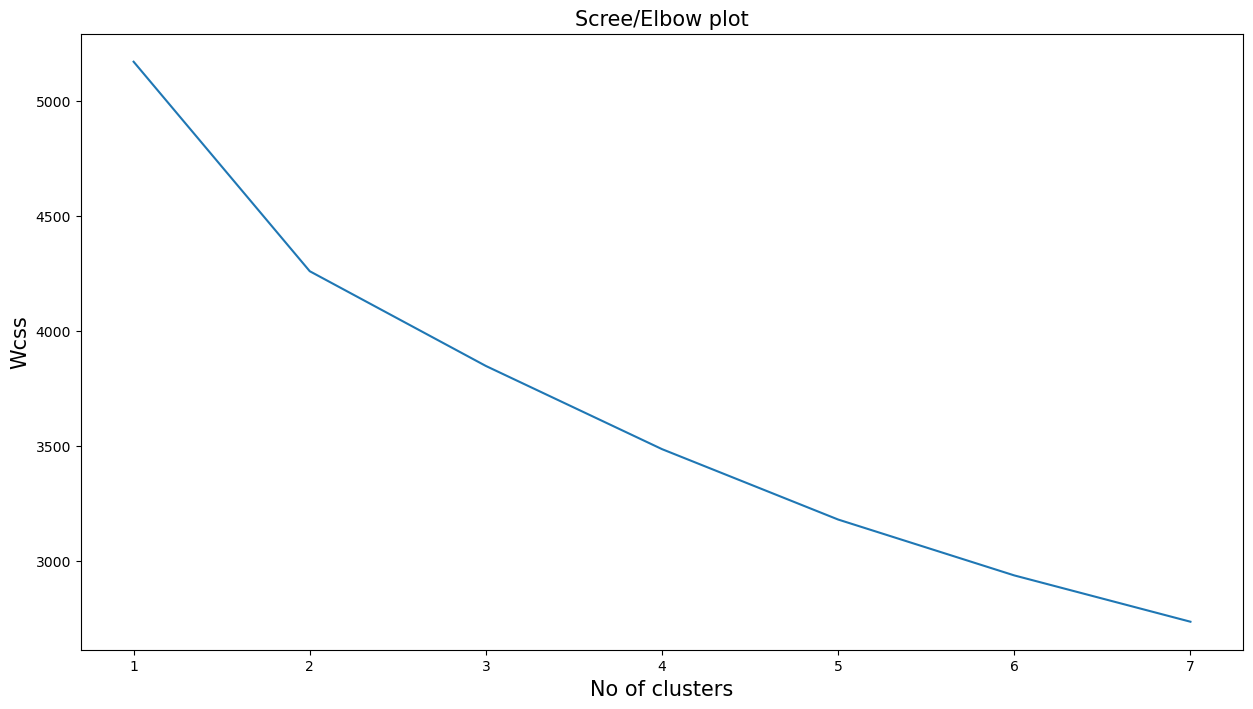

In [20]:
plt.plot(range(1,8),wcss)

plt.title('Scree/Elbow plot',fontsize=15)
plt.xlabel('No of clusters',fontsize=15)
plt.ylabel('Wcss',fontsize=15)

plt.show()

From the above Elbow plot we can consider that the optimal value of k=2

In [21]:
n_clusters = [2,3,4,5,6,7]

for k in n_clusters:
    
    cluster = KMeans(n_clusters=k,random_state=10)
    model = cluster.fit_predict(df1)
    score = silhouette_score(df1,model,random_state=10)
    print('The no of clusters={},the silhouette score is {}'.format(k,score))

The no of clusters=2,the silhouette score is 0.21567152493858144
The no of clusters=3,the silhouette score is 0.2254158948218309
The no of clusters=4,the silhouette score is 0.14787514172386923
The no of clusters=5,the silhouette score is 0.1593591327474479
The no of clusters=6,the silhouette score is 0.1676974342451352
The no of clusters=7,the silhouette score is 0.1696071882357389


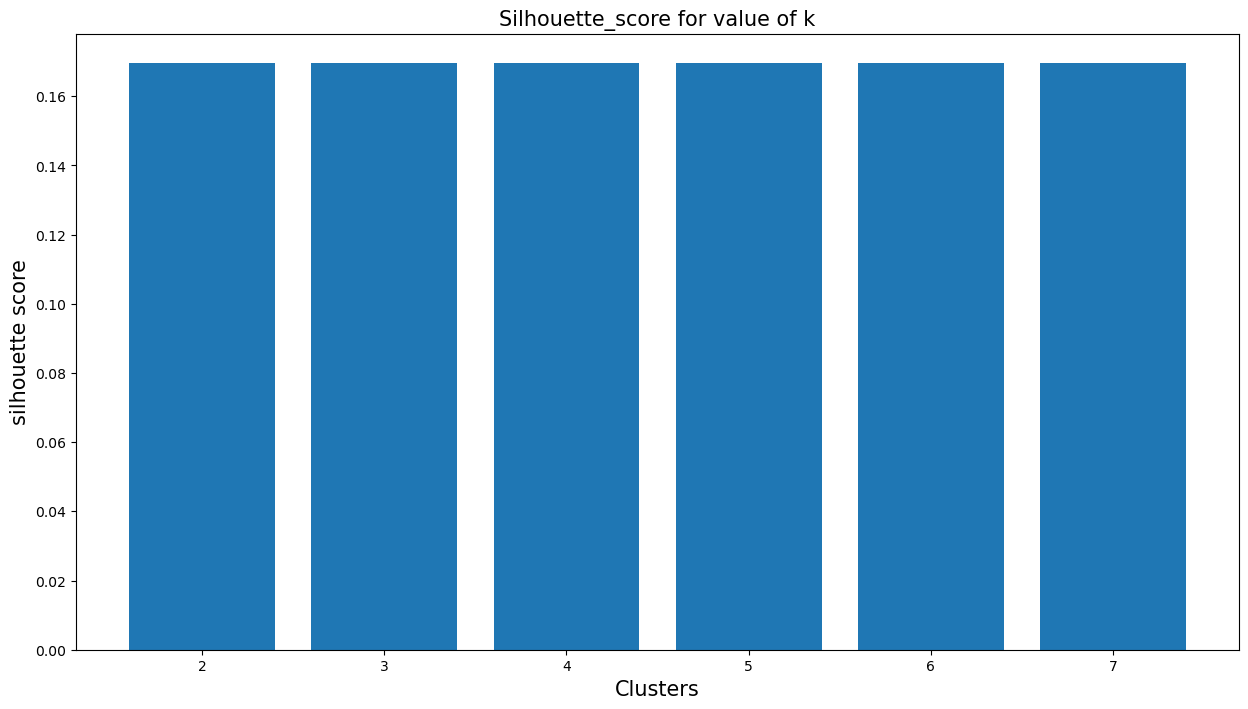

In [53]:
plt.bar(n_clusters,score)

plt.title('Silhouette_score for value of k',fontsize=15)
plt.xlabel('Clusters',fontsize=15)
plt.ylabel('silhouette score',fontsize=15)

plt.show()

From silhouette Score we can say that the optimal number of clusters are k=3

In [22]:
k_model = KMeans(n_clusters=3,random_state=10)
k_model.fit(df1)

KMeans(n_clusters=3, random_state=10)

In [23]:
df1['k_label'] = k_model.labels_

df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,k_label
0,-0.660779,-0.607131,0.0,0.0,-0.356750,-0.717657,2.056551,-0.356271,0.0,0.0,...,0.0,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0,1
1,0.420306,-0.272426,0.0,0.0,-0.853222,-0.882523,-0.667033,-0.047348,0.0,0.0,...,0.0,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0,1
2,-0.660779,-0.607131,0.0,0.0,-0.667045,-0.608825,1.545879,1.625985,0.0,0.0,...,0.0,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0,1
3,-0.660779,-0.607131,0.0,0.0,-0.853222,-0.573625,-0.667033,-0.582814,0.0,0.0,...,0.0,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0,1
4,-0.120237,-0.525991,0.0,0.0,-0.356750,-0.717059,2.283516,1.960652,0.0,0.0,...,0.0,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0,1


In [24]:
centers = pd.DataFrame(k_model.cluster_centers_, columns =  (df1.drop(['k_label'], axis=1)).columns)      

centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,1.270352,1.209674,0.0,0.0,0.762816,0.724999,-0.015820,-0.524613,0.0,0.0,...,0.0,0.0,0.0,0.0,0.336004,0.0,0.0,0.0,0.0,0.0
1,-0.498449,-0.494962,0.0,0.0,-0.360977,-0.323719,-0.015366,0.227530,0.0,0.0,...,0.0,0.0,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0
2,0.049648,0.141044,0.0,0.0,0.314375,0.209449,0.098926,-0.120575,0.0,0.0,...,0.0,0.0,0.0,0.0,-2.466210,0.0,0.0,0.0,0.0,0.0


In [25]:
df1['k_label'].value_counts()

1    323
0    124
2     70
Name: k_label, dtype: int64

In [26]:
df1[df1['k_label']==0].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,k_label
count,124.000000,124.000000,124.0,124.0,124.000000,124.000000,124.000000,124.000000,124.0,124.0,...,124.0,124.0,124.0,124.000000,124.0,124.0,124.0,124.0,124.0,124.0
mean,1.270352,1.209674,0.0,0.0,0.762816,0.724999,-0.015820,-0.524613,0.0,0.0,...,0.0,0.0,0.0,0.336004,0.0,0.0,0.0,0.0,0.0,0.0
std,1.090217,1.110777,0.0,0.0,1.235731,1.259394,0.906700,0.560763,0.0,0.0,...,0.0,0.0,0.0,0.443024,0.0,0.0,0.0,0.0,0.0,0.0
min,-0.660779,-0.607131,0.0,0.0,-0.977341,-0.886833,-0.667033,-1.339044,0.0,0.0,...,0.0,0.0,0.0,-2.466210,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.420306,0.290488,0.0,0.0,-0.108513,-0.232682,-0.667033,-0.970941,0.0,0.0,...,0.0,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.960848,1.063015,0.0,0.0,0.387959,0.286526,-0.441504,-0.600584,0.0,0.0,...,0.0,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.041933,2.075583,0.0,0.0,1.505023,1.526343,0.352022,-0.136277,0.0,0.0,...,0.0,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,0.0
max,4.204103,3.936748,0.0,0.0,3.863268,3.922756,2.873626,1.037434,0.0,0.0,...,0.0,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df1[df1['k_label']==1].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,k_label
count,323.000000,323.000000,323.0,323.0,323.000000,323.000000,323.000000,323.000000,323.0,323.0,...,323.0,323.0,323.0,3.230000e+02,323.0,323.0,323.0,323.0,323.0,323.0
mean,-0.498449,-0.494962,0.0,0.0,-0.360977,-0.323719,-0.015366,0.227530,0.0,0.0,...,0.0,0.0,0.0,4.054805e-01,0.0,0.0,0.0,0.0,0.0,1.0
std,0.368773,0.317268,0.0,0.0,0.629228,0.661280,1.041829,1.049045,0.0,0.0,...,0.0,0.0,0.0,1.779113e-15,0.0,0.0,0.0,0.0,0.0,0.0
min,-0.660779,-0.607131,0.0,0.0,-1.163518,-0.936400,-0.667033,-1.321758,0.0,0.0,...,0.0,0.0,0.0,4.054805e-01,0.0,0.0,0.0,0.0,0.0,1.0
25%,-0.660779,-0.607131,0.0,0.0,-0.853222,-0.775127,-0.667033,-0.582814,0.0,0.0,...,0.0,0.0,0.0,4.054805e-01,0.0,0.0,0.0,0.0,0.0,1.0
50%,-0.660779,-0.607131,0.0,0.0,-0.542927,-0.569115,-0.667033,-0.047348,0.0,0.0,...,0.0,0.0,0.0,4.054805e-01,0.0,0.0,0.0,0.0,0.0,1.0
75%,-0.660779,-0.607131,0.0,0.0,-0.046454,-0.093861,0.558123,0.883532,0.0,0.0,...,0.0,0.0,0.0,4.054805e-01,0.0,0.0,0.0,0.0,0.0,1.0
max,1.501391,1.299675,0.0,0.0,2.435909,3.028461,2.939194,2.629985,0.0,0.0,...,0.0,0.0,0.0,4.054805e-01,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
df1[df1['k_label']==2].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,k_label
count,70.000000,70.000000,70.0,70.0,70.000000,70.000000,70.000000,70.000000,70.0,70.0,...,70.0,70.0,70.0,7.000000e+01,70.0,70.0,70.0,70.0,70.0,70.0
mean,0.049648,0.141044,0.0,0.0,0.314375,0.209449,0.098926,-0.120575,0.0,0.0,...,0.0,0.0,0.0,-2.466210e+00,0.0,0.0,0.0,0.0,0.0,2.0
std,0.820769,1.013340,0.0,0.0,1.080297,1.070071,0.974960,1.022187,0.0,0.0,...,0.0,0.0,0.0,8.945913e-16,0.0,0.0,0.0,0.0,0.0,0.0
min,-0.660779,-0.607131,0.0,0.0,-1.163518,-0.936400,-0.667033,-1.386014,0.0,0.0,...,0.0,0.0,0.0,-2.466210e+00,0.0,0.0,0.0,0.0,0.0,2.0
25%,-0.660779,-0.607131,0.0,0.0,-0.465353,-0.548415,-0.667033,-0.925848,0.0,0.0,...,0.0,0.0,0.0,-2.466210e+00,0.0,0.0,0.0,0.0,0.0,2.0
50%,-0.120237,-0.331253,0.0,0.0,0.108693,-0.189541,-0.277903,-0.424798,0.0,0.0,...,0.0,0.0,0.0,-2.466210e+00,0.0,0.0,0.0,0.0,0.0,2.0
75%,0.420306,0.789249,0.0,0.0,0.791343,0.638626,0.501384,0.295416,0.0,0.0,...,0.0,0.0,0.0,-2.466210e+00,0.0,0.0,0.0,0.0,0.0,2.0
max,2.582476,3.827208,0.0,0.0,2.746205,3.852346,2.847592,2.629985,0.0,0.0,...,0.0,0.0,0.0,-2.466210e+00,0.0,0.0,0.0,0.0,0.0,2.0


In [29]:
silh_scor = []
k=[2,3,4,5,6,7]

for i in k:
    cluster = AgglomerativeClustering(n_clusters=i,linkage='ward')
    model = cluster.fit_predict(df1)
    silh_scor.append(silhouette_score(df1,model,random_state=10))
    
silh_scor

[0.19204688518732674,
 0.22313404540672285,
 0.15184796571417192,
 0.14126575547700115,
 0.1268732392995845,
 0.11835340210920425]

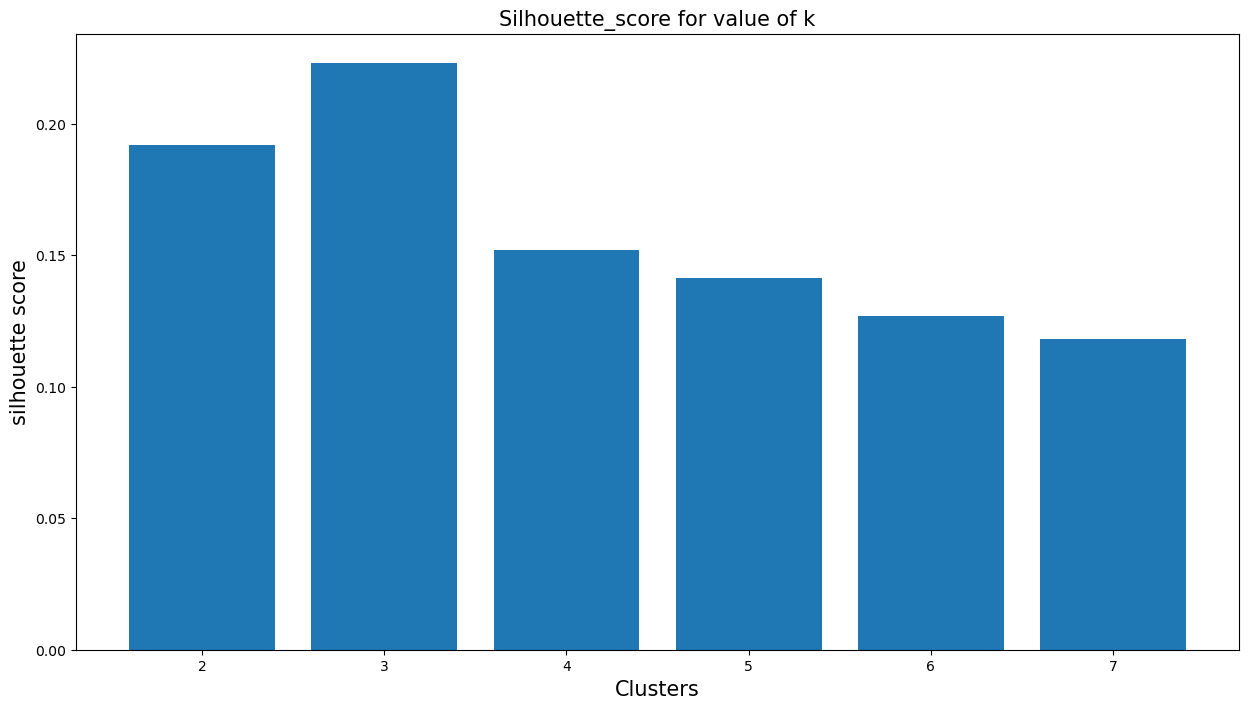

In [55]:
plt.bar(k,silh_scor)

plt.title('Silhouette_score for value of k',fontsize=15)
plt.xlabel('Clusters',fontsize=15)
plt.ylabel('silhouette score',fontsize=15)

plt.show()

In [30]:
linkage_mat = linkage(df1,method='ward')
linkage_mat[:5]

array([[1.50000000e+01, 2.33000000e+02, 1.29306116e-02, 2.00000000e+00],
       [7.90000000e+01, 8.30000000e+01, 2.15510194e-02, 2.00000000e+00],
       [1.80000000e+01, 1.21000000e+02, 2.15510194e-02, 2.00000000e+00],
       [3.67000000e+02, 4.03000000e+02, 6.03428543e-02, 2.00000000e+00],
       [2.50000000e+02, 5.19000000e+02, 7.45999382e-02, 3.00000000e+00]])

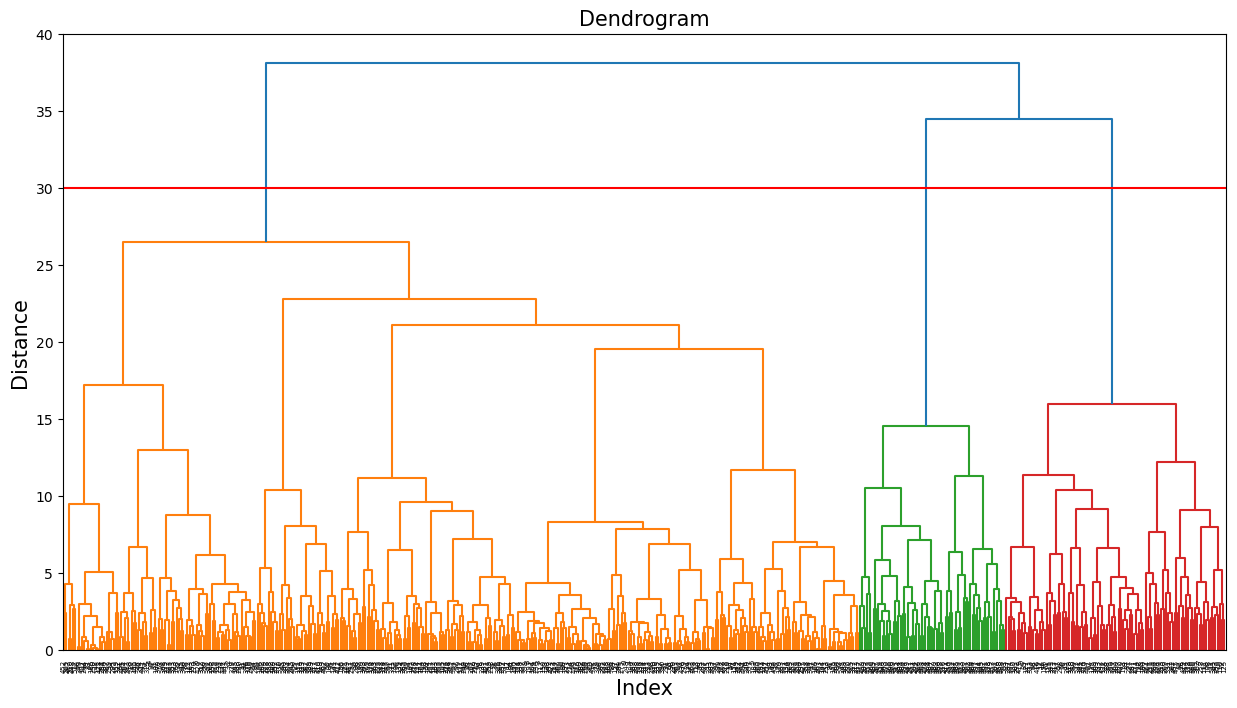

In [56]:
dendr0 = dendrogram(linkage_mat)

plt.title('Dendrogram',fontsize=15)
plt.xlabel('Index',fontsize=15)
plt.ylabel('Distance',fontsize=15)
plt.axhline(y=30,color='red')

plt.show()

In [32]:
hier = AgglomerativeClustering(n_clusters=3,linkage='ward')

hier_model = hier.fit(df1)
hier_model

AgglomerativeClustering(n_clusters=3)

In [33]:
df1['hier_cluster'] = hier_model.labels_
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,k_label,hier_cluster
0,-0.660779,-0.607131,0.0,0.0,-0.356750,-0.717657,2.056551,-0.356271,0.0,0.0,...,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0,1,0
1,0.420306,-0.272426,0.0,0.0,-0.853222,-0.882523,-0.667033,-0.047348,0.0,0.0,...,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0,1,0
2,-0.660779,-0.607131,0.0,0.0,-0.667045,-0.608825,1.545879,1.625985,0.0,0.0,...,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0,1,0
3,-0.660779,-0.607131,0.0,0.0,-0.853222,-0.573625,-0.667033,-0.582814,0.0,0.0,...,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0,1,0
4,-0.120237,-0.525991,0.0,0.0,-0.356750,-0.717059,2.283516,1.960652,0.0,0.0,...,0.0,0.0,0.40548,0.0,0.0,0.0,0.0,0.0,1,0


In [34]:
df1['hier_cluster'].value_counts()

0    354
1     98
2     65
Name: hier_cluster, dtype: int64

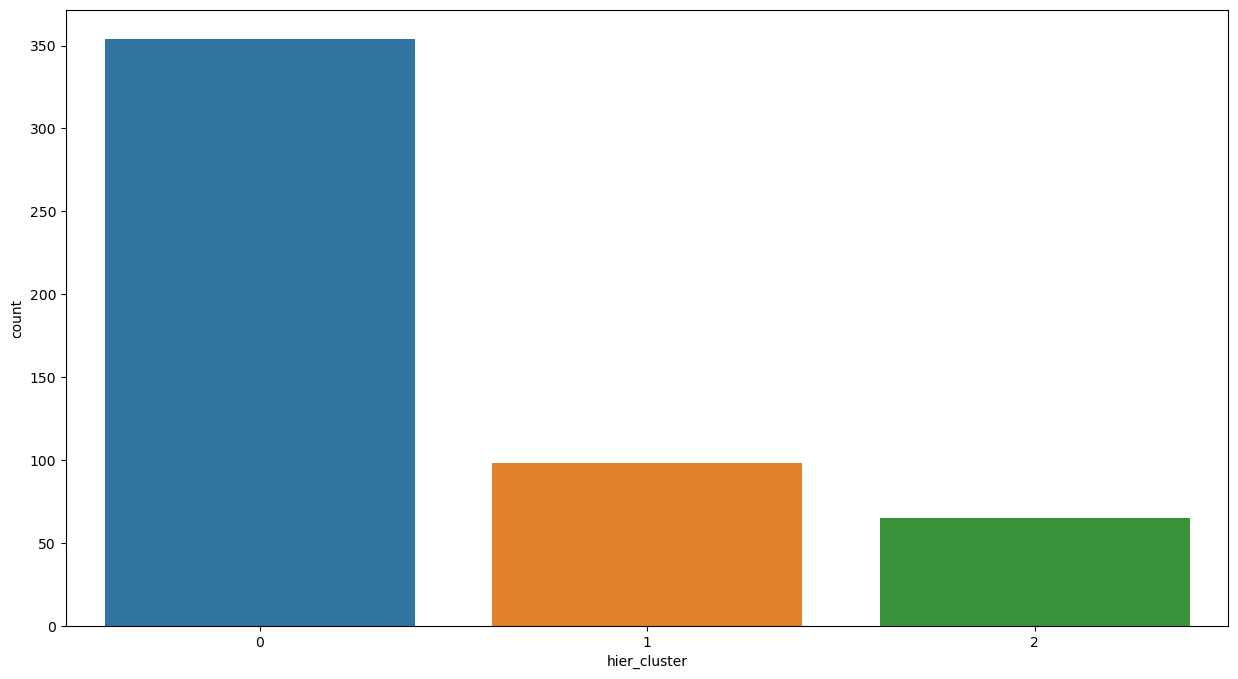

In [35]:
sns.countplot(data=df1,x='hier_cluster')
plt.show()

In [36]:
df1[df1['hier_cluster'] == 0].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,k_label,hier_cluster
count,354.000000,354.000000,354.0,354.0,354.000000,354.000000,354.000000,354.000000,354.0,354.0,...,354.0,354.0,354.000000,354.0,354.0,354.0,354.0,354.0,354.000000,354.0
mean,-0.440898,-0.449121,0.0,0.0,-0.224041,-0.171309,-0.021449,0.201844,0.0,0.0,...,0.0,0.0,0.356808,0.0,0.0,0.0,0.0,0.0,0.926554,0.0
std,0.473987,0.402227,0.0,0.0,0.860513,0.910082,1.032596,1.074066,0.0,0.0,...,0.0,0.0,0.371205,0.0,0.0,0.0,0.0,0.0,0.319748,0.0
min,-0.660779,-0.607131,0.0,0.0,-1.163518,-0.936400,-0.667033,-1.334527,0.0,0.0,...,0.0,0.0,-2.466210,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
25%,-0.660779,-0.607131,0.0,0.0,-0.791163,-0.767165,-0.667033,-0.608567,0.0,0.0,...,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
50%,-0.660779,-0.607131,0.0,0.0,-0.480868,-0.528008,-0.667033,-0.047348,0.0,0.0,...,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
75%,-0.660779,-0.607131,0.0,0.0,0.077664,0.076019,0.501838,0.855430,0.0,0.0,...,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
max,2.041933,2.090797,0.0,0.0,3.863268,3.922756,2.939194,2.629985,0.0,0.0,...,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,2.000000,0.0


In [37]:
df1[df1['hier_cluster'] == 1].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,k_label,hier_cluster
count,98.000000,98.000000,98.0,98.0,98.000000,98.000000,98.000000,98.000000,98.0,98.0,...,98.0,98.0,98.000000,98.0,98.0,98.0,98.0,98.0,98.000000,98.0
mean,1.495875,1.454603,0.0,0.0,0.539941,0.418098,-0.025949,-0.501365,0.0,0.0,...,0.0,0.0,0.346875,0.0,0.0,0.0,0.0,0.0,0.071429,1.0
std,1.022356,1.028250,0.0,0.0,1.139763,1.106006,0.880946,0.540614,0.0,0.0,...,0.0,0.0,0.408121,0.0,0.0,0.0,0.0,0.0,0.258863,0.0
min,-0.120237,-0.066193,0.0,0.0,-0.977341,-0.886833,-0.667033,-1.339044,0.0,0.0,...,0.0,0.0,-2.466210,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
25%,0.960848,0.693656,0.0,0.0,-0.294691,-0.422950,-0.667033,-0.926916,0.0,0.0,...,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
50%,1.501391,1.222374,0.0,0.0,0.294871,0.122721,-0.413048,-0.582814,0.0,0.0,...,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
75%,2.041933,2.138974,0.0,0.0,1.256787,0.906362,0.423152,-0.141104,0.0,0.0,...,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
max,4.204103,3.936748,0.0,0.0,3.863268,3.912459,2.873626,0.927966,0.0,0.0,...,0.0,0.0,0.405480,0.0,0.0,0.0,0.0,0.0,1.000000,1.0


In [38]:
df1[df1['hier_cluster'] == 2].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,k_label,hier_cluster
count,65.000000,65.000000,65.0,65.0,65.000000,65.000000,65.000000,65.000000,65.0,65.0,...,65.0,65.0,65.00000,65.0,65.0,65.0,65.0,65.0,65.000000,65.0
mean,0.145877,0.252887,0.0,0.0,0.406100,0.302612,0.155937,-0.343367,0.0,0.0,...,0.0,0.0,-2.46621,0.0,0.0,0.0,0.0,0.0,1.969231,2.0
std,0.855330,1.078295,0.0,0.0,1.064641,1.064342,0.996276,0.736374,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.248069,0.0
min,-0.660779,-0.607131,0.0,0.0,-1.163518,-0.936400,-0.667033,-1.386014,0.0,0.0,...,0.0,0.0,-2.46621,0.0,0.0,0.0,0.0,0.0,0.000000,2.0
25%,-0.660779,-0.607131,0.0,0.0,-0.418809,-0.447767,-0.667033,-0.995570,0.0,0.0,...,0.0,0.0,-2.46621,0.0,0.0,0.0,0.0,0.0,2.000000,2.0
50%,-0.120237,-0.197371,0.0,0.0,0.201782,-0.117198,-0.164098,-0.493570,0.0,0.0,...,0.0,0.0,-2.46621,0.0,0.0,0.0,0.0,0.0,2.000000,2.0
75%,0.420306,0.825002,0.0,0.0,0.946491,0.756787,0.586950,0.025470,0.0,0.0,...,0.0,0.0,-2.46621,0.0,0.0,0.0,0.0,0.0,2.000000,2.0
max,2.582476,3.827208,0.0,0.0,2.746205,3.852346,2.847592,1.625985,0.0,0.0,...,0.0,0.0,-2.46621,0.0,0.0,0.0,0.0,0.0,2.000000,2.0


In [39]:
cov_mat = np.cov(df1.T)
cov_mat[:3]

array([[ 1.00193798e+00,  7.55336700e-01,  0.00000000e+00,
         0.00000000e+00,  3.14906938e-01,  2.42807603e-01,
         1.23188717e-02, -3.00816772e-01,  0.00000000e+00,
         0.00000000e+00,  4.41391887e-02,  0.00000000e+00,
         5.35324050e-02,  9.62043760e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.94498298e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.98543288e-01,  3.20852124e-01],
       [ 7.55336700e-01,  1.00193798e+00,  0.00000000e+00,
         0.00000000e+00,  2.42296951e-01,  2.34674173e-01,
        -3.05243666e-04, -2.80051791e-01,  0.00000000e+00,
         0.00000000e+00,  6.48078856e-02,  0.00000000e+00,
         6.00607982e-02,  2.87125535e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.08062992e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [40]:
eig_val,eig_vec = np.linalg.eig(cov_mat)

print('Eigen values',eig_val)

print('Eigen vector',eig_vec)

Eigen values [2.75189274 0.04206273 0.07758436 0.22302558 0.28839422 0.51111151
 1.52933184 0.87765195 0.95748906 1.00685076 1.32166603 1.29629281
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
Eigen vector [[ 4.63922960e-01  7.32833231e-02 -2.06560101e-01  6.14594814e-01
   3.72772845e-01  2.39454878e-02  2.50523643e-01 -1.59550550e-01
  -1.66107324e-01 -2.77895352e-02 -3.20773772e-01  1.10958132e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.50333823e-01  4.64207054e-02 -2.17309656e-01 -5.96446483e-01
  -3.42279744e-01  1.10730833e-01  2.13115419e-01 -2.49717211e-01
  -1.43878449e-01 -4.38160139e-02 -3.61470144e-01  3.99693469e-02
   0.00000000e+00  0.00000000e+00  0.00000

In [41]:
eig_val = list(eig_val)

eig_val.sort(reverse=True)

print(eig_val)

[2.7518927429411426, 1.5293318369811064, 1.3216660292081108, 1.296292806611787, 1.006850759228838, 0.9574890561551163, 0.8776519474261094, 0.5111115105131645, 0.2883942216026937, 0.2230255773693941, 0.07758436094862238, 0.04206272635165554, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


According to the Kaiser criterion if the eig_val is greater than are considered as the number of PCA,here the Pca is 5

In [42]:
per_var = []
for i  in eig_val:
    variation = (i/sum(eig_val))*100
    per_var.append(variation)
    
print(per_var)

[25.285338052207347, 14.052027496806257, 12.143922551621188, 11.910784645913328, 9.251291454046072, 8.797739130012621, 8.064168285544957, 4.696268544204705, 2.6498654078115256, 2.0492357969034645, 0.7128718221967232, 0.38648681273180274, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


The first PCA is expaling around 25% of variation in the data

In [43]:
np.cumsum(per_var)

array([ 25.28533805,  39.33736555,  51.4812881 ,  63.39207275,
        72.6433642 ,  81.44110333,  89.50527162,  94.20154016,
        96.85140557,  98.90064137,  99.61351319, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        ])

The First 5 components are explaining around 70% of the variation in the data 

In [44]:
pca = PCA(n_components = 3, random_state = 10)

components = pca.fit_transform(df1)

In [45]:
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2','PC3'])

df_pca.head()

,PC1,PC2,PC3
0,-1.102646,0.155514,0.832435
1,-0.850405,-0.520128,-0.139613
2,-1.883143,0.055100,-0.166336
3,-1.176833,-0.045997,0.655984
4,-1.653287,-0.564324,-0.918443


The above dataframe contains three principal components obtained from the orginal data.Here we have reduced the original data from 25 t0 3

In [46]:
top_eig_vec=pd.DataFrame(pca.components_[0:5,:])
top_eig_vec.columns=df1.columns
top_eig_vec.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,k_label,hier_cluster
0,0.463923,0.450334,8.673617e-19,0.000000e+00,0.436391,0.395397,-0.001058,-0.347251,0.000000e+00,1.292470e-26,...,0.0,0.0,-0.164299,0.0,0.0,0.0,0.0,0.0,-0.133578,0.262881
1,-0.250524,-0.213115,-1.110223e-16,-2.775558e-17,0.107980,0.089463,0.104365,0.050458,-0.000000e+00,-3.388132e-21,...,-0.0,-0.0,-0.702705,-0.0,-0.0,-0.0,-0.0,-0.0,0.401473,0.316817
2,-0.320774,-0.361470,-0.000000e+00,-1.110223e-16,0.404648,0.450815,-0.109715,-0.184078,1.734723e-18,-2.168404e-19,...,-0.0,-0.0,0.294544,-0.0,-0.0,-0.0,-0.0,-0.0,-0.084203,-0.255303


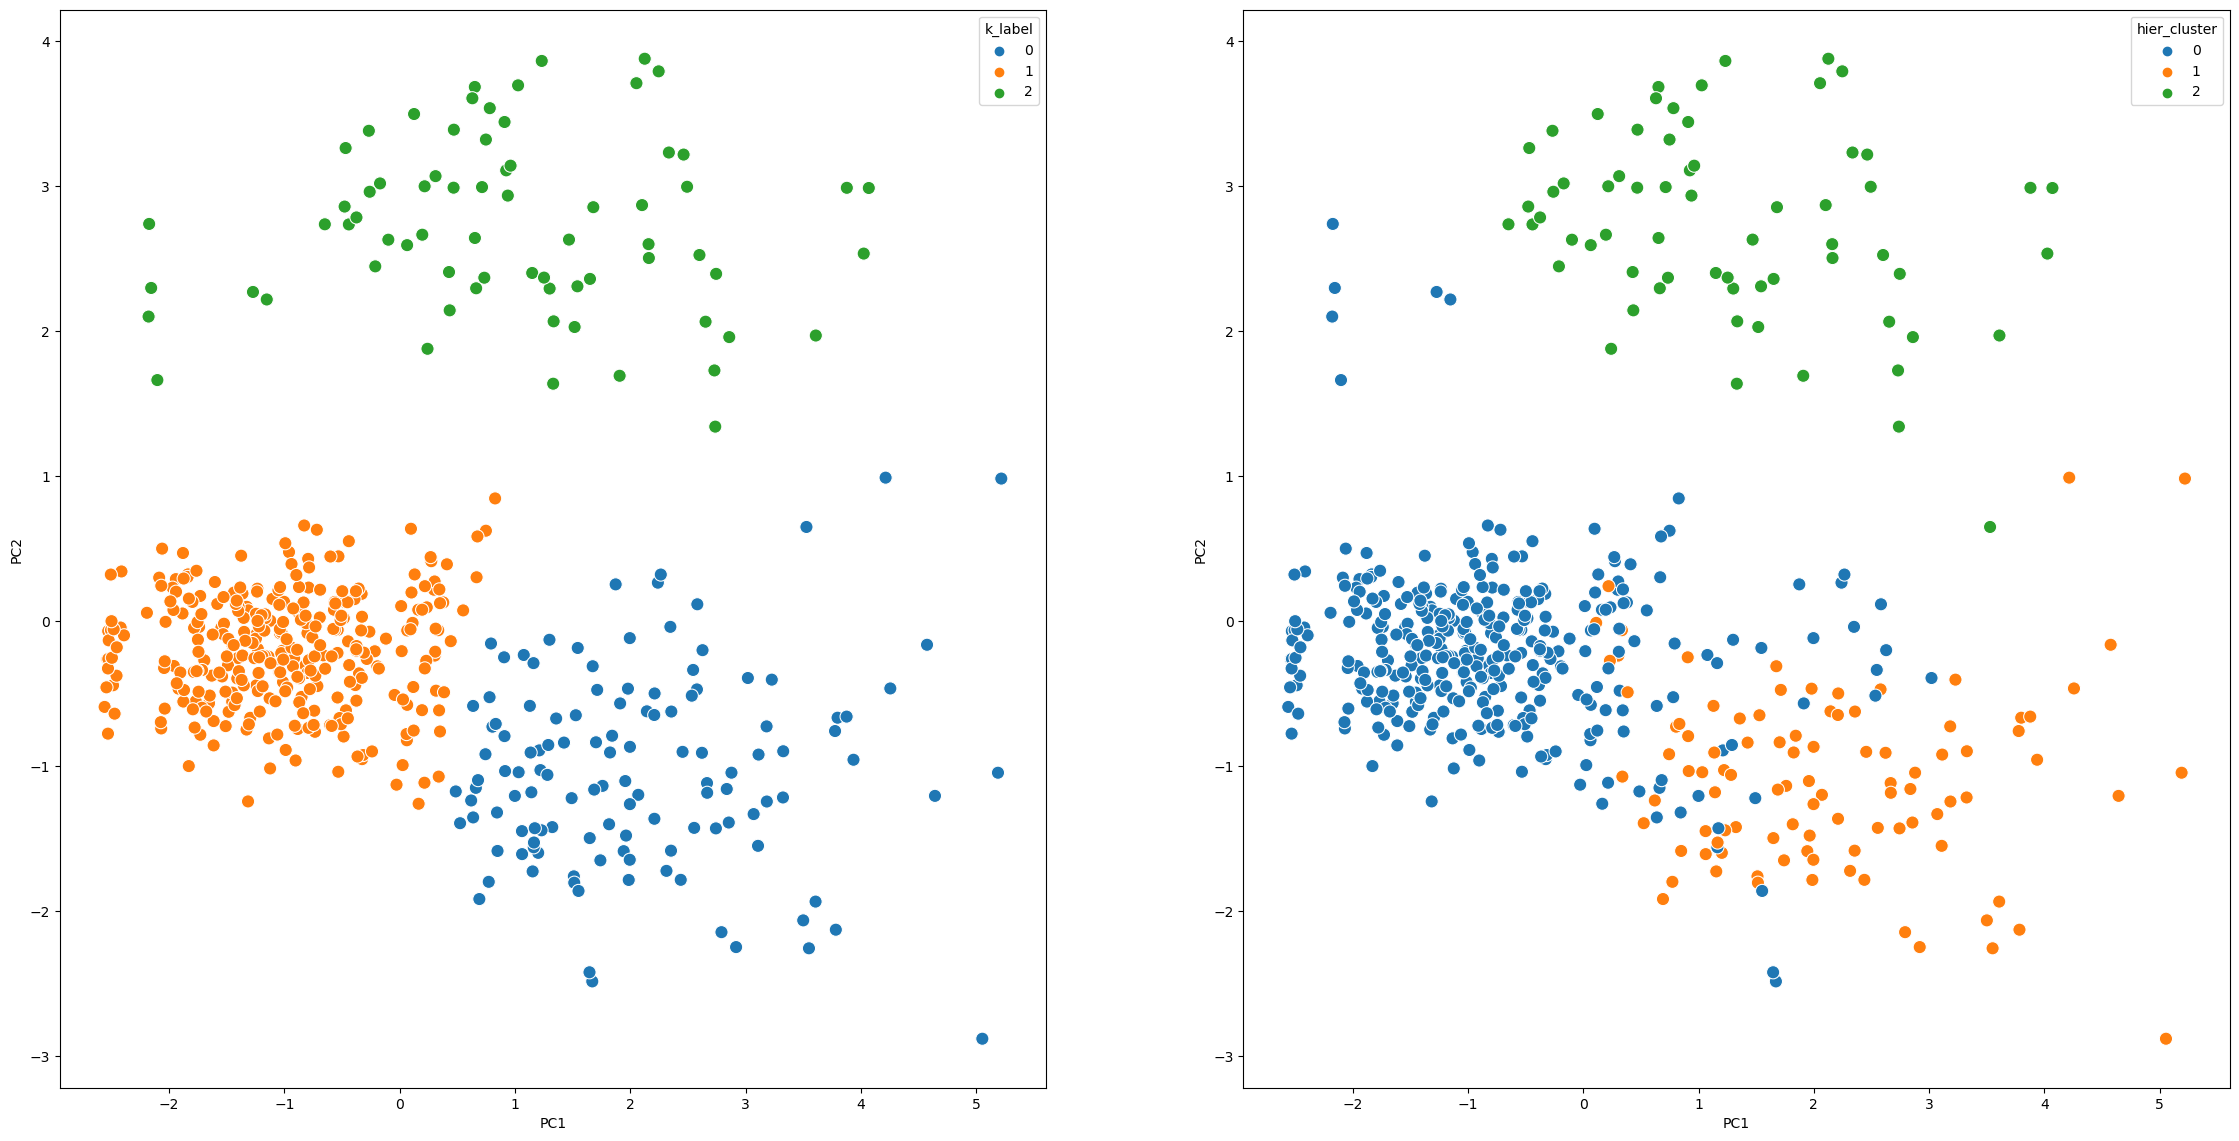

In [52]:
plt.figure(figsize=(28,14))

plt.subplot(1,2,1)
sns.scatterplot(x='PC1' ,y='PC2' ,data=df_pca, s=90, hue= df1['k_label'],palette='tab10')

plt.subplot(1,2,2)
sns.scatterplot(x='PC1' ,y='PC2' ,data=df_pca, s=90, hue= df1['hier_cluster'],palette='tab10')

plt.show()